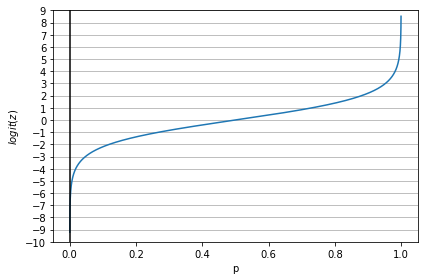

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def logit(p):
    ones = np.ones(p.size)
    return np.log(p / (ones - p))

z = np.arange(0.0001, 0.9999, 0.0001)
phi_z = logit(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-7, 7)
plt.xlabel('p')
plt.ylabel('$logit(z)$')

plt.yticks(range(-10, 10, 1))
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer #乳がんのデータセット
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cancer = load_breast_cancer() 
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

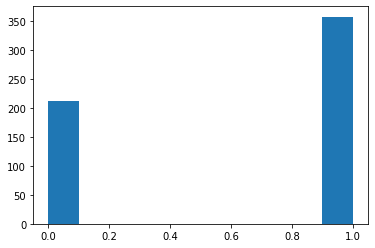

In [5]:
plt.hist(cancer.target)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)
#stratify: データを均一に分割する

720


In [8]:
#ロジスティック回帰クラスからインスタンス生成
logreg = LogisticRegression(max_iter = 10000)
logreg_scaled = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [9]:
print(f"訓練データ精度　=　{logreg.score(X_train, Y_train)}")
print(f"テストデータ精度　=　{logreg.score(X_test, Y_test)}")

訓練データ精度　=　0.9577464788732394
テストデータ精度　=　0.958041958041958


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(cancer.data)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
logreg_scaled.fit(scaled_X_train, Y_train)

LogisticRegression()

In [17]:
#初期化
logreg_scaled = LogisticRegression(max_iter=10000)
logreg_scaled.fit(scaled_X_train, Y_train)

LogisticRegression(max_iter=10000)

In [18]:
print(logreg_scaled.coef_)
print(f"標準化訓練データ精度　=　{logreg_scaled.score(scaled_X_train, Y_train)}")
print(f"標準化テストデータ精度　=　{logreg_scaled.score(scaled_X_test, Y_test)}")
result_df = pd.DataFrame(data= np.exp(logreg_scaled.coef_), columns= cancer.feature_names)
result_df.T

[[-0.52948081 -0.51329296 -0.48953064 -0.56316866 -0.31330859  0.70318369
  -0.57467505 -0.67356334 -0.13148364  0.07345091 -1.11810237  0.24824668
  -0.54317735 -0.92656667 -0.15329312  0.58135444  0.17805359 -0.35666771
   0.42127835  0.35877818 -0.92617614 -1.21179635 -0.72453931 -0.93567316
  -0.66034351  0.05864486 -0.80578922 -0.92293008 -0.9291561  -0.17347488]]
標準化訓練データ精度　=　0.9882629107981221
標準化テストデータ精度　=　0.986013986013986


,0
mean radius,0.588911
mean texture,0.598521
mean perimeter,0.612914
mean area,0.569402
mean smoothness,0.731024
mean compactness,2.020174
mean concavity,0.562888
mean concave points,0.509888
mean symmetry,0.876794
mean fractal dimension,1.076216


In [29]:
#regularization
logreg100 = LogisticRegression(penalty="none" ,C=100 , max_iter=10000).fit(X_train, Y_train)
print(logreg100.score(X_train, Y_train))
print(logreg100.score(X_test, Y_test))
print(logreg100.score(X_train, Y_train) - logreg100.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


0.9835680751173709
0.972027972027972
0.011540103089398901


In [37]:
logreg001 = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, Y_train)
print(logreg001.score(X_train, Y_train))
print(logreg001.score(X_test, Y_test))
print(logreg001.score(X_train, Y_train) - logreg001.score(X_test, Y_test))

0.9507042253521126
0.951048951048951
-0.0003447256968384105


In [31]:
logreg50 = LogisticRegression(C=50, max_iter=10000).fit(X_train, Y_train)
print(logreg50.score(X_train, Y_train))
print(logreg50.score(X_test, Y_test))
print(logreg50.score(X_train, Y_train) - logreg50.score(X_test, Y_test))

0.9765258215962441
0.965034965034965
0.011490856561279128


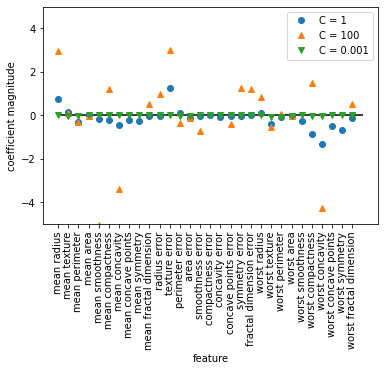

In [ ]:
#正則化を行うと説明変数の影響はどうなるのか
plt.plot(logreg.coef_.T, 'o', label = "C = 1")
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg001.coef_.T, 'v', label = "C = 0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coefficient magnitude")
plt.legend()

In [39]:
def fibonacci(n):
    if n == 0:
        return 1
    elif  n == 1:
        return 2
    return(fibonacci(n-1)+fibonacci(n-2))
fibonacci(4)

8